In [17]:
import os
from matplotlib import pyplot as plt
import cv2
import matplotlib.patches as patches
from PIL import Image

In [2]:
from pandas import read_excel
def extract_intervals(size: tuple, split_size: tuple):
    """
    A function to generate pixel intervals
    :param size: the tuple representing (length, height)
    :param split_size: the split size
    :return:
    """
    og_width, og_height = size[0], size[1]
    if og_width < split_size[0] or og_height < split_size[1]:
        raise ValueError("The split size is larger than the image")
    result_widths = [
        (i, i + split_size[0])
        for i in range(0, og_width, split_size[0])
        if (split_size[0] + i) <= og_width
    ]
    result_heights = [
        (i, i + split_size[1])
        for i in range(0, og_height, split_size[1])
        if (split_size[1] + i) <= og_height
    ]
    return result_widths, result_heights

In [11]:
pixel_coord = os.path.join('/home/md273/CS5099-working-copy/', 'data/data_files/pixel_coord.xlsx')
print(pixel_coord)
locations = read_excel(pixel_coord, sheet_name="PixelCoordinates",)[["tiff_file", "x_pixel", "y_pixel"]]
file_props = read_excel(pixel_coord, sheet_name="FileOverview",).dropna()
locations = locations.merge(
    file_props[["tiff_file", "image_width", "image_height"]], how="inner"
)

/home/md273/CS5099-working-copy/data/data_files/pixel_coord.xlsx


In [12]:
locations.head()

,tiff_file,x_pixel,y_pixel,image_width,image_height
0,StitchMICE_FoFcr16_1_1012_CP_FINAL.tif,NaN,NaN,2958.0,3044.0
1,StitchMICE_FoFcr16_2_1024_CP_FINAL.tif,1067.0,1289.0,3391.0,3191.0
2,StitchMICE_FoFcr16_2_1024_CP_FINAL.tif,279.0,1210.0,3391.0,3191.0
3,StitchMICE_FoFcr16_3_1102_CP_FINAL.tif,714.0,1550.0,3479.0,3252.0
4,StitchMICE_FoFcr16_3_1102_CP_FINAL.tif,1660.0,2357.0,3479.0,3252.0


In [13]:
locations = locations.dropna()

In [15]:
img_name = locations['tiff_file'].iloc[0]
img_name

'StitchMICE_FoFcr16_2_1024_CP_FINAL.tif'

In [30]:
from itertools import permutations, combinations

In [34]:
intervals = extract_intervals((3391, 3191), (416, 416))
print(intervals)
intervals = list(permutations(intervals[0], r=2))
# 1067 1902

([(0, 416), (416, 832), (832, 1248), (1248, 1664), (1664, 2080), (2080, 2496), (2496, 2912), (2912, 3328)], [(0, 416), (416, 832), (832, 1248), (1248, 1664), (1664, 2080), (2080, 2496), (2496, 2912)])


(3391, 3191)


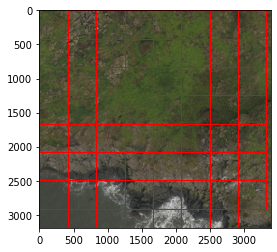

In [35]:
img_path = os.path.join('/data2/seals/TIFFs', img_name)
with Image.open(img_path) as img:
    print(img.size)
    intervals = (patches.Rectangle((x[0],y[0]),416,416,linewidth=1,edgecolor='r',facecolor='none') for x, y in intervals)
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for rectangle in intervals:
        ax.add_patch(rectangle)
    plt.show()